In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
import src.config as config

In [13]:
import hopsworks

project = hopsworks.login(
    project=config.HOPSWORKS_PROJECT_NAME, api_key_value=config.HOPSWORKS_API_KEY
)

feature_store = project.get_feature_store()
feature_group = feature_store.get_feature_group(
    name=config.FEATURE_GROUP_NAME,
    version=config.FEATURE_GROUP_VERSION
)

2025-05-03 16:37:31,870 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-05-03 16:37:31,875 INFO: Initializing external client
2025-05-03 16:37:31,877 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-05-03 16:37:32,721 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1212635


In [14]:
# Create a feature view if it doesn't already exist
try:
    feature_store.create_feature_view(
        name=config.FEATURE_VIEW_NAME,
        version=config.FEATURE_VIEW_VERSION,
        query=feature_group.select_all(),
    )
    print(f"Feature view '{config.FEATURE_VIEW_NAME}' (version {config.FEATURE_VIEW_VERSION}) created successfully.")
except Exception as e:
    print(f"Error creating feature view: {e}")

# Retrieve the feature view
try:
    feature_view = feature_store.get_feature_view(
        name=config.FEATURE_VIEW_NAME,
        version=config.FEATURE_VIEW_VERSION,
    )
    print(f"Feature view '{config.FEATURE_VIEW_NAME}' (version {config.FEATURE_VIEW_VERSION}) retrieved successfully.")
except Exception as e:
    print(f"Error retrieving feature view: {e}")

Feature view created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1212635/fs/1200268/fv/bike_time_series_hourly_feature_view/version/1
Feature view 'bike_time_series_hourly_feature_view' (version 1) created successfully.
Feature view 'bike_time_series_hourly_feature_view' (version 1) retrieved successfully.


In [15]:
ts_data, _ = feature_view.training_data(
    description="Time-series hourly taxi rides"
)

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.58s) 


In [16]:
ts_data = ts_data.sort_values(["start_station_id", "start_hour"]).reset_index(drop=True)

In [17]:
ts_data.shape

(61401, 3)

In [18]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61401 entries, 0 to 61400
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   start_hour        61401 non-null  object 
 1   start_station_id  61401 non-null  float32
 2   rides             61401 non-null  int32  
dtypes: float32(1), int32(1), object(1)
memory usage: 959.5+ KB


In [19]:
ts_data.describe()

,start_station_id,rides
count,61401.000000,61401.000000
mean,6289.093262,13.767479
std,388.898743,14.821426
min,5905.140137,0.000000
25%,5905.140137,2.000000
50%,6140.049805,9.000000
75%,6822.089844,22.000000
max,6822.089844,101.000000


In [20]:
ts_data['start_hour'].min()

'2023-01-01 05:00:00+00:00'

In [21]:
ts_data['start_hour'].max()

'2025-05-03 19:00:00+00:00'

In [22]:
ts_data.tail()

,start_hour,start_station_id,rides
61396,2025-05-03 15:00:00+00:00,6822.089844,20
61397,2025-05-03 16:00:00+00:00,6822.089844,16
61398,2025-05-03 17:00:00+00:00,6822.089844,25
61399,2025-05-03 18:00:00+00:00,6822.089844,13
61400,2025-05-03 19:00:00+00:00,6822.089844,18


In [23]:
import pandas as pd
ts_data["start_hour"] = pd.to_datetime(ts_data["start_hour"], errors="coerce")

In [24]:
ts_data

,start_hour,start_station_id,rides
0,2023-01-01 05:00:00+00:00,5905.140137,0
1,2023-01-01 06:00:00+00:00,5905.140137,5
2,2023-01-01 07:00:00+00:00,5905.140137,7
3,2023-01-01 08:00:00+00:00,5905.140137,3
4,2023-01-01 09:00:00+00:00,5905.140137,2
...,...,...,...
61396,2025-05-03 15:00:00+00:00,6822.089844,20
61397,2025-05-03 16:00:00+00:00,6822.089844,16
61398,2025-05-03 17:00:00+00:00,6822.089844,25
61399,2025-05-03 18:00:00+00:00,6822.089844,13


In [25]:
ts_data["start_hour"] = ts_data["start_hour"].dt.tz_convert("US/Eastern")  # Remove timezone

In [26]:
ts_data

,start_hour,start_station_id,rides
0,2023-01-01 00:00:00-05:00,5905.140137,0
1,2023-01-01 01:00:00-05:00,5905.140137,5
2,2023-01-01 02:00:00-05:00,5905.140137,7
3,2023-01-01 03:00:00-05:00,5905.140137,3
4,2023-01-01 04:00:00-05:00,5905.140137,2
...,...,...,...
61396,2025-05-03 11:00:00-04:00,6822.089844,20
61397,2025-05-03 12:00:00-04:00,6822.089844,16
61398,2025-05-03 13:00:00-04:00,6822.089844,25
61399,2025-05-03 14:00:00-04:00,6822.089844,13


In [27]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61401 entries, 0 to 61400
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype                     
---  ------            --------------  -----                     
 0   start_hour        61401 non-null  datetime64[ns, US/Eastern]
 1   start_station_id  61401 non-null  float32                   
 2   rides             61401 non-null  int32                     
dtypes: datetime64[ns, US/Eastern](1), float32(1), int32(1)
memory usage: 959.5 KB


In [28]:
ts_data["year_month"] = ts_data["start_hour"].dt.to_period("M")  # Year-Month format

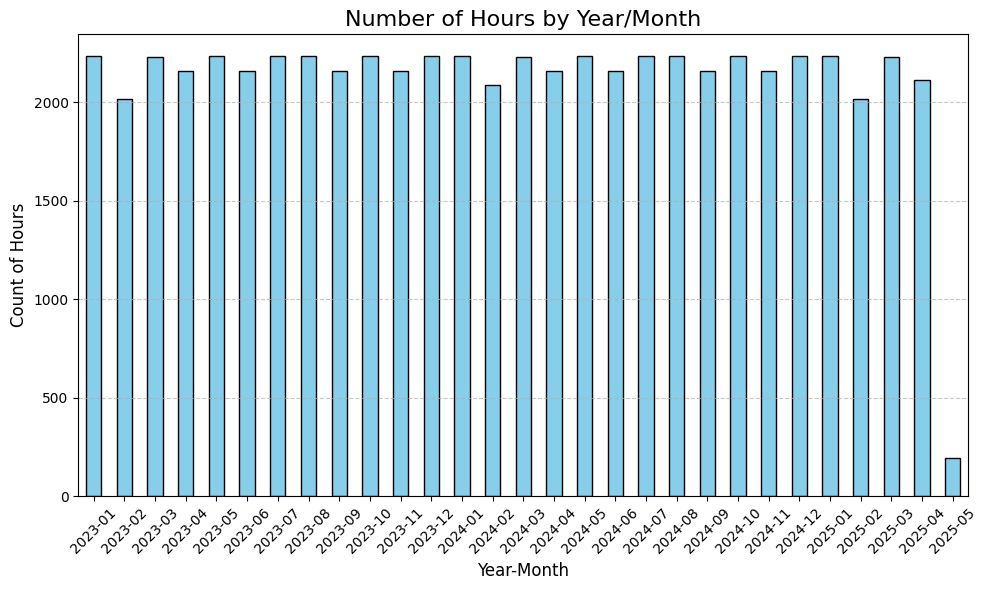

In [29]:
import matplotlib.pyplot as plt

# Group by year_month and count
hour_counts = ts_data.groupby("year_month").size()

# Plot the data
ax = hour_counts.plot(kind="bar", figsize=(10, 6), color="skyblue", edgecolor="black")  # Use 'ax' to store the plot object
ax.set_title("Number of Hours by Year/Month", fontsize=16)
ax.set_xlabel("Year-Month", fontsize=12)
ax.set_ylabel("Count of Hours", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [30]:
ts_data.head()

,start_hour,start_station_id,rides,year_month
0,2023-01-01 00:00:00-05:00,5905.140137,0,2023-01
1,2023-01-01 01:00:00-05:00,5905.140137,5,2023-01
2,2023-01-01 02:00:00-05:00,5905.140137,7,2023-01
3,2023-01-01 03:00:00-05:00,5905.140137,3,2023-01
4,2023-01-01 04:00:00-05:00,5905.140137,2,2023-01


In [45]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61401 entries, 0 to 61400
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype                     
---  ------            --------------  -----                     
 0   start_hour        61401 non-null  datetime64[ns, US/Eastern]
 1   start_station_id  61401 non-null  float32                   
 2   rides             61401 non-null  int32                     
 3   year_month        61401 non-null  period[M]                 
dtypes: datetime64[ns, US/Eastern](1), float32(1), int32(1), period[M](1)
memory usage: 1.4 MB


In [34]:
from src.data_utils import transform_ts_data_into_features_and_target_loop

features, targets = transform_ts_data_into_features_and_target_loop(ts_data, window_size=24*28, step_size=23)

In [35]:
features.sort_values(["start_station_id", "start_hour"])

,rides_t-672,rides_t-671,rides_t-670,rides_t-669,rides_t-668,rides_t-667,rides_t-666,rides_t-665,rides_t-664,rides_t-663,...,rides_t-8,rides_t-7,rides_t-6,rides_t-5,rides_t-4,rides_t-3,rides_t-2,rides_t-1,start_hour,start_station_id
0,0,5,7,3,2,1,2,0,2,2,...,18,30,25,13,12,9,9,11,2023-01-29 05:00:00,5905.140137
1,4,2,0,0,0,1,1,0,0,6,...,22,19,24,17,7,11,14,7,2023-01-30 04:00:00,5905.140137
2,4,6,1,2,1,0,0,0,1,3,...,27,32,30,40,27,28,23,10,2023-01-31 03:00:00,5905.140137
3,9,5,2,2,5,0,0,1,0,4,...,22,15,20,28,34,34,22,22,2023-02-01 02:00:00,5905.140137
4,9,5,5,5,0,2,0,1,1,2,...,19,19,14,20,15,16,23,25,2023-02-02 01:00:00,5905.140137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578,20,19,28,55,53,23,23,14,5,2,...,7,6,6,2,1,0,1,0,2025-04-29 09:00:00,6822.089844
2579,0,1,2,3,7,5,1,4,4,2,...,13,4,6,6,0,1,1,0,2025-04-30 08:00:00,6822.089844
2580,0,0,3,4,9,30,17,7,10,11,...,27,15,7,2,3,2,0,1,2025-05-01 07:00:00,6822.089844
2581,0,0,0,2,10,15,23,19,15,11,...,45,22,23,9,4,6,5,2,2025-05-02 06:00:00,6822.089844


In [36]:
features_targets = features.copy()
features_targets["target"] = targets

features_targets.shape

(2583, 675)

In [37]:
features_targets.head()

,rides_t-672,rides_t-671,rides_t-670,rides_t-669,rides_t-668,rides_t-667,rides_t-666,rides_t-665,rides_t-664,rides_t-663,...,rides_t-7,rides_t-6,rides_t-5,rides_t-4,rides_t-3,rides_t-2,rides_t-1,start_hour,start_station_id,target
0,0,5,7,3,2,1,2,0,2,2,...,30,25,13,12,9,9,11,2023-01-29 05:00:00,5905.140137,10
1,4,2,0,0,0,1,1,0,0,6,...,19,24,17,7,11,14,7,2023-01-30 04:00:00,5905.140137,4
2,4,6,1,2,1,0,0,0,1,3,...,32,30,40,27,28,23,10,2023-01-31 03:00:00,5905.140137,7
3,9,5,2,2,5,0,0,1,0,4,...,15,20,28,34,34,22,22,2023-02-01 02:00:00,5905.140137,12
4,9,5,5,5,0,2,0,1,1,2,...,19,14,20,15,16,23,25,2023-02-02 01:00:00,5905.140137,11


In [48]:
from datetime import datetime, timedelta
import pandas as pd
from src.data_utils import split_time_series_data

# Define the cutoff date as 28 days before today
cutoff_date = pd.Timestamp(datetime.now() - timedelta(days=28))
# # Convert the cutoff date to a string in a specific format (e.g., 'YYYY-MM-DD')
# cutoff_date_str = cutoff_date.strftime('%Y-%m-%d')
# # Print the string representation of the cutoff date
# print(f"Cutoff date as string: {cutoff_date_str}")
cutoff_date

Timestamp('2025-04-05 16:48:08.813396')

In [49]:
df_5905 = features_targets[features_targets["start_station_id"] == 5905.140137]
df_6140 = features_targets[features_targets["start_station_id"] == 6140.049805]
df_6822 = features_targets[features_targets["start_station_id"] == 6822.089844]

In [50]:
df_5905

,rides_t-672,rides_t-671,rides_t-670,rides_t-669,rides_t-668,rides_t-667,rides_t-666,rides_t-665,rides_t-664,rides_t-663,...,rides_t-7,rides_t-6,rides_t-5,rides_t-4,rides_t-3,rides_t-2,rides_t-1,start_hour,start_station_id,target
0,0,5,7,3,2,1,2,0,2,2,...,30,25,13,12,9,9,11,2023-01-29 05:00:00,5905.140137,10
1,4,2,0,0,0,1,1,0,0,6,...,19,24,17,7,11,14,7,2023-01-30 04:00:00,5905.140137,4
2,4,6,1,2,1,0,0,0,1,3,...,32,30,40,27,28,23,10,2023-01-31 03:00:00,5905.140137,7
3,9,5,2,2,5,0,0,1,0,4,...,15,20,28,34,34,22,22,2023-02-01 02:00:00,5905.140137,12
4,9,5,5,5,0,2,0,1,1,2,...,19,14,20,15,16,23,25,2023-02-02 01:00:00,5905.140137,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,20,21,32,36,44,29,24,14,6,0,...,11,11,5,5,2,3,1,2025-04-29 09:00:00,5905.140137,2
857,1,0,1,8,2,7,2,2,5,4,...,23,8,2,2,1,0,1,2025-04-30 08:00:00,5905.140137,2
858,1,0,0,9,8,16,20,10,14,11,...,28,22,10,12,7,0,1,2025-05-01 07:00:00,5905.140137,0
859,1,2,2,1,4,10,19,23,22,20,...,40,34,14,12,14,6,1,2025-05-02 06:00:00,5905.140137,2


In [51]:
X_train_5905, y_train_5905, X_test_5905, y_test_5905 = split_time_series_data(
    df_5905,
    cutoff_date=cutoff_date,
    target_column="target"
)

print(X_train_5905.shape)
print(y_train_5905.shape)
print(X_test_5905.shape)
print(y_test_5905.shape)

(832, 674)
(832,)
(29, 674)
(29,)


In [54]:
X_train_6140, y_train_6140, X_test_6140, y_test_6140 = split_time_series_data(
    df_6140,
    cutoff_date=cutoff_date,
    target_column="target"
)

print(X_train_6140.shape)
print(y_train_6140.shape)
print(X_test_6140.shape)
print(y_test_6140.shape)

(832, 674)
(832,)
(29, 674)
(29,)


In [55]:
X_train_6822, y_train_6822, X_test_6822, y_test_6822 = split_time_series_data(
    df_6822,
    cutoff_date=cutoff_date,
    target_column="target"
)

print(X_train_6822.shape)
print(y_train_6822.shape)
print(X_test_6822.shape)
print(y_test_6822.shape)

(832, 674)
(832,)
(29, 674)
(29,)


In [56]:
from src.pipeline_utils import get_pipeline
pipeline = get_pipeline()

In [57]:
from sklearn.metrics import mean_absolute_error
import joblib

preds_dict = {}
mae = {}
for i in range(0,3):
    if i == 0:
        pipeline.fit(X_train_5905, y_train_5905)
        preds = pipeline.predict(X_test_5905)
        preds_dict[5905] = preds
        test_mae = mean_absolute_error(y_test_5905, preds)
        mae[5905] = test_mae

        joblib.dump(pipeline, config.MODELS_DIR / "lgb_model_5905.pkl")

    if i == 1:
        pipeline.fit(X_train_6140, y_train_6140)
        preds = pipeline.predict(X_test_6140)
        preds_dict[6140] = preds
        test_mae = mean_absolute_error(y_test_6140, preds)
        mae[6140] = test_mae

        joblib.dump(pipeline, config.MODELS_DIR / "lgb_model_6140.pkl")

    if i == 2:
        pipeline.fit(X_train_6822, y_train_6822)
        preds = pipeline.predict(X_test_6822)
        preds_dict[6822] = preds
        test_mae = mean_absolute_error(y_test_6822, preds)
        mae[6822] = test_mae

        joblib.dump(pipeline, config.MODELS_DIR / "lgb_model_6822.pkl")
    

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34976
[LightGBM] [Info] Number of data points in the train set: 832, number of used features: 675
[LightGBM] [Info] Start training from score 13.825721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39327
[LightGBM]

In [58]:
mae

{5905: 4.869058930262806, 6140: 9.8533602326231, 6822: 4.1790884239231545}

In [59]:
from hsml.schema import Schema
from hsml.model_schema import ModelSchema

input_schema = Schema(features)
output_schema = Schema(targets)
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

In [60]:
model_registry = project.get_model_registry()

model_5905 = model_registry.sklearn.create_model(
    name="bike_demand_predictor_next_hour_5905",
    metrics={"test_mae": mae[5905]},
    description="LightGBM regressor",
    input_example=X_test_5905.sample(),
    model_schema=model_schema
)

model_6140 = model_registry.sklearn.create_model(
    name="bike_demand_predictor_next_hour_6140",
    metrics={"test_mae": mae[6140]},
    description="LightGBM regressor",
    input_example=X_test_6140.sample(),
    model_schema=model_schema
)

model_6822 = model_registry.sklearn.create_model(
    name="bike_demand_predictor_next_hour_6822",
    metrics={"test_mae": mae[6822]},
    description="LightGBM regressor",
    input_example=X_test_6822.sample(),
    model_schema=model_schema
)

In [61]:
model_5905.save('C:\\Users\\nolan\\cda500\\citi_bike\\models\\lgb_model_5905.pkl')
model_6140.save('C:\\Users\\nolan\\cda500\\citi_bike\\models\\lgb_model_6140.pkl')
model_6822.save('C:\\Users\\nolan\\cda500\\citi_bike\\models\\lgb_model_6822.pkl')

  0%|          | 0/6 [00:00<?, ?it/s]

Uploading C:\Users\nolan\cda500\citi_bike\models\lgb_model_5905.pkl: 0.000%|          | 0/318399 elapsed<00:00…

Uploading c:\Users\nolan\cda500\citi_bike\notebooks\input_example.json: 0.000%|          | 0/2457 elapsed<00:0…

Uploading c:\Users\nolan\cda500\citi_bike\notebooks\model_schema.json: 0.000%|          | 0/51324 elapsed<00:0…

Model created, explore it at https://c.app.hopsworks.ai:443/p/1212635/models/bike_demand_predictor_next_hour_5905/1


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading C:\Users\nolan\cda500\citi_bike\models\lgb_model_6140.pkl: 0.000%|          | 0/318361 elapsed<00:00…

Uploading c:\Users\nolan\cda500\citi_bike\notebooks\input_example.json: 0.000%|          | 0/2449 elapsed<00:0…

Uploading c:\Users\nolan\cda500\citi_bike\notebooks\model_schema.json: 0.000%|          | 0/51324 elapsed<00:0…

Model created, explore it at https://c.app.hopsworks.ai:443/p/1212635/models/bike_demand_predictor_next_hour_6140/1


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading C:\Users\nolan\cda500\citi_bike\models\lgb_model_6822.pkl: 0.000%|          | 0/319572 elapsed<00:00…

Uploading c:\Users\nolan\cda500\citi_bike\notebooks\input_example.json: 0.000%|          | 0/2390 elapsed<00:0…

Uploading c:\Users\nolan\cda500\citi_bike\notebooks\model_schema.json: 0.000%|          | 0/51324 elapsed<00:0…

Model created, explore it at https://c.app.hopsworks.ai:443/p/1212635/models/bike_demand_predictor_next_hour_6822/1


Model(name: 'bike_demand_predictor_next_hour_6822', version: 1)

In [63]:
from src.inference import load_model_from_registry

model = load_model_from_registry(station_id=5905)

2025-05-03 17:22:09,375 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-05-03 17:22:09,381 INFO: Initializing external client
2025-05-03 17:22:09,383 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-05-03 17:22:10,083 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1212635


Downloading: 0.000%|          | 0/318399 elapsed<00:00 remaining<?

In [64]:
from src.inference import get_model_predictions

preds = get_model_predictions(model, X_test_5905)

In [65]:
preds

,start_station_id,predicted_demand
0,5905.140137,9.0
1,5905.140137,2.0
2,5905.140137,2.0
3,5905.140137,3.0
4,5905.140137,8.0
5,5905.140137,9.0
6,5905.140137,9.0
7,5905.140137,13.0
8,5905.140137,11.0
9,5905.140137,22.0


In [66]:
test_mae = mean_absolute_error(y_test_5905, preds['predicted_demand'])
print(f"{test_mae:.4f}")

4.7931
